In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the breast cancer data
dataset = pd.read_csv('train_data2.csv')

#breast_ca = datasets.load_breast_cancer()

# Explore the data
print(dataset.keys())

# Assign input X and target y
#X = dataset.data
#y = dataset.target

Index(['resistance_thumb', 'bend_thumb', 'resistance_index', 'bend_index',
       'resistance_mid', 'bend_mid', 'resistance_ring', 'bend_ring', 'x', 'y',
       'z', 'stage'],
      dtype='object')


In [2]:
# Putting feature variable to X
X = dataset.drop('stage',axis=1)
# Putting response variable to y
y = dataset['stage']

In [3]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((428, 11), (184, 11))

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [5]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: total: 562 ms
Wall time: 515 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [6]:
# checking the oob score
classifier_rf.oob_score_

0.8785046728971962

In [7]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [8]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [11]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 4.41 s
Wall time: 2min 15s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [12]:
grid_search.best_score_

0.8855140186915887

In [13]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

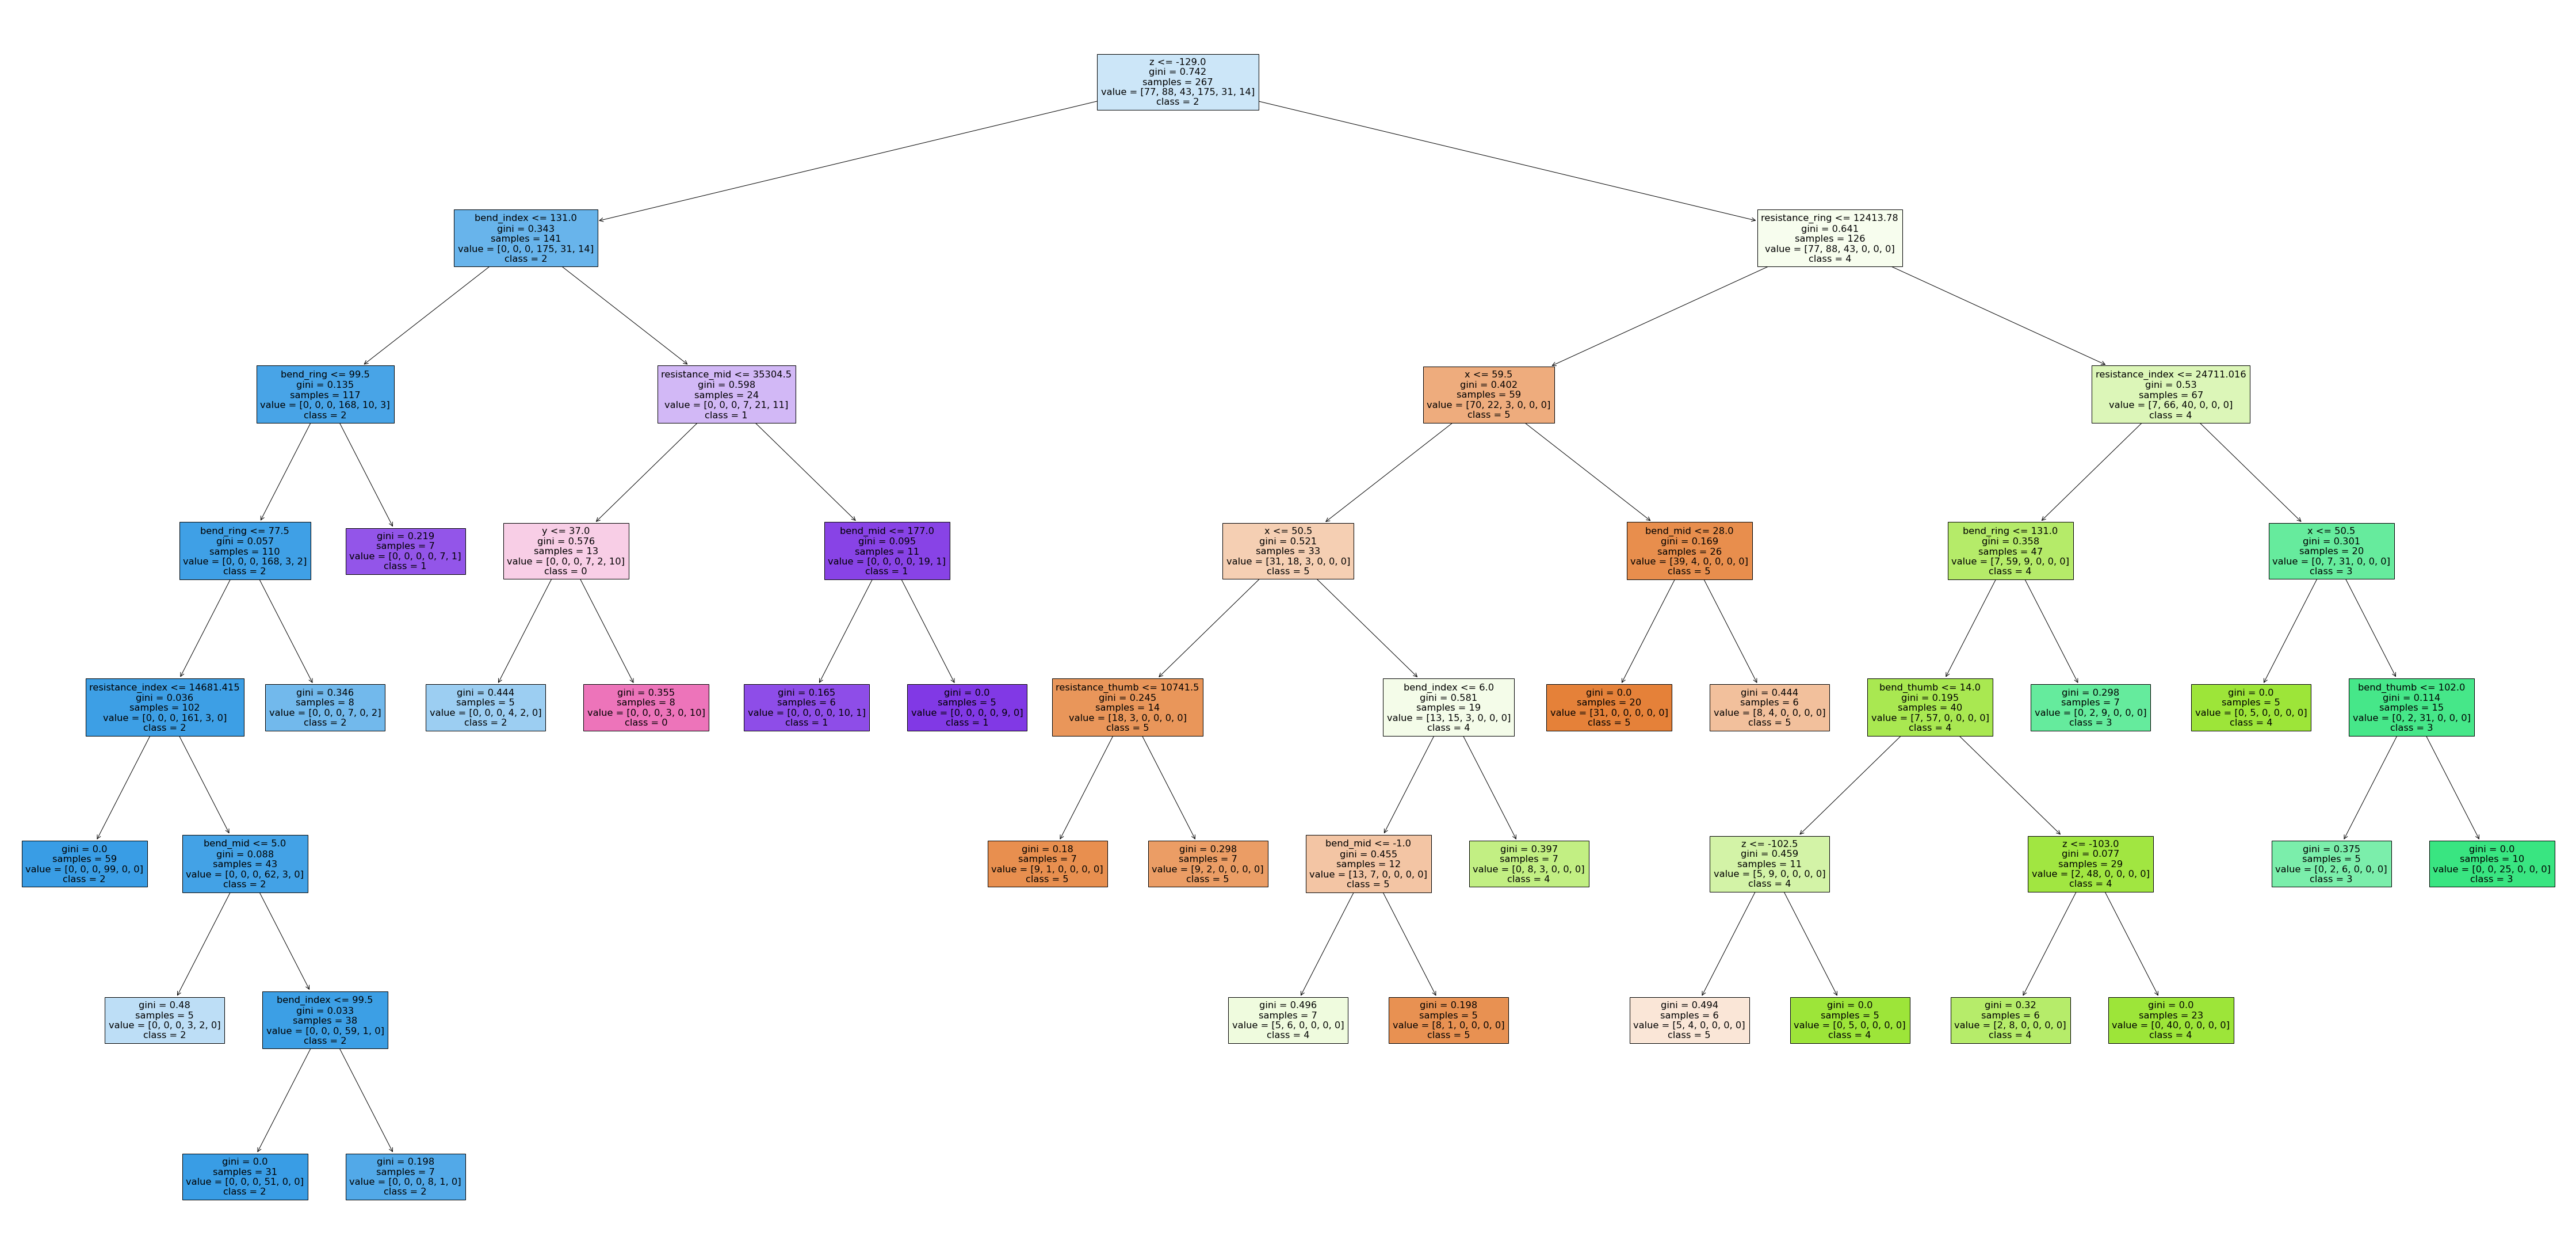

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['5', '4', '3', '2', '1', '0'],filled=True);

In [15]:
rf_best.feature_importances_

array([0.04955784, 0.03424746, 0.07254392, 0.08789719, 0.05569357,
       0.07365468, 0.06015171, 0.0671223 , 0.13442365, 0.09129949,
       0.27340819])

In [16]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [17]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,z,0.273408
8,x,0.134424
9,y,0.091299
3,bend_index,0.087897
5,bend_mid,0.073655
2,resistance_index,0.072544
7,bend_ring,0.067122
6,resistance_ring,0.060152
4,resistance_mid,0.055694
0,resistance_thumb,0.049558
